# Testing the Network with MNIST Dataset
For this test, I will use Scikit-Learn to download the dataset, since it has a built-in function for it. Keep in mind that the neural network in this notebook is not optimized for these kinds of tasks. Also, a convolutional network might be more appropriate here, instead of a fully-connected feedforward one.

## Download the MNIST dataset

In [8]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from activations import *

mnist = fetch_openml('mnist_784', as_frame=False)

In [9]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
mnist.target.shape

(70000,)

## Data Transformations
I will convert the target labels into one-hot encoded vectors so that the neural network is easier to train.
At the same time, I will normalize the data pixel data to be in the range [-1, 1] to help the neural network.

In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(mnist.target.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

In [12]:
# now transform the target data using the encoder
encoded_targets = encoder.transform(mnist.target.reshape(-1,1)).toarray()
encoded_targets

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(mnist.data)

encoded_targets = scaler.fit_transform(encoded_targets)

## Create a Mini Dataset for Training Toy Example
The full MNIST dataset has 70000 samples and this neural network is not designed for efficiency. Therefore, I will only use a fraction of the data to check how the network behaves.

In [14]:
# we will use only a portion of the dataset

train_data_size = 300
test_data_size  = 25

X_train = scaled_data[:train_data_size]        #mnist.data[:data_size]
y_train = encoded_targets[:train_data_size]    #mnist.target[:data_size]   #toarray() converts the sparse matrix output from one-hot encoding into a numpy array

X_test = scaled_data[train_data_size:train_data_size+test_data_size]       #mnist.data[data_size:data_size+200]
y_test = encoded_targets[train_data_size:train_data_size+test_data_size]  #mnist.target[data_size:data_size+200]

In [15]:
X_train.shape
y_train.shape

(300, 10)

In [16]:
#this function is taken from the book "Hands-on Machine Learning": 
# (ref. link) https://amzn.to/43SyF81

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

Image Label (one-hot encoded vector): [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]


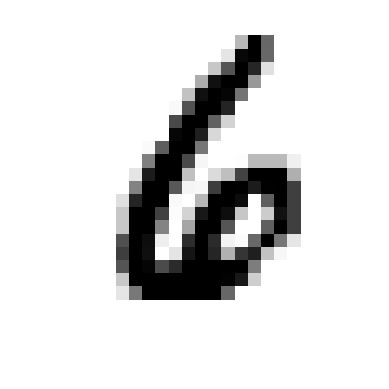

In [17]:
_idx = 155
img = X_train[_idx]
plot_digit(img)
print(f"Image Label (one-hot encoded vector): {y_train[_idx]}")

In [18]:
#here is the same data as a numpy array
img.reshape(28,28)

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

## Let's Create a Neural Network


In [19]:
#network hyperparameters

#-- topology
n_features = X_train.shape[1]
n_hidden_1 = int(n_features * 0.7) 
n_hidden_2 = int(n_hidden_1 * 0.5)
n_outputs  = y_train.shape[1]

topology   = [n_features, n_hidden_1, n_hidden_2, n_outputs]

#-- learning
learning_rate = 0.01
momentum = 0.1


In [20]:
from neural_networks import NeuralNet

nnet = NeuralNet(
    topology=topology,
    learning_rate=learning_rate,
    momentum=momentum, 
    init_method='xavier',
    hidden_activation_func=tanh,
)

nnet.shape

(784, 548, 274, 10)

In [21]:
nnet.n_trainable_params

583356

In [22]:
nnet.feedforward(X_test[0])

array([[ 7.22440354e-02,  1.35891699e-02, -3.30640502e-05,
         5.25074477e-02, -6.98330674e-02, -6.88819061e-02,
         8.90051521e-02,  1.75155886e-01,  5.81020976e-03,
        -1.77089941e-02]])

In [23]:
nnet.train(X_train, y_train, epochs=150)

---------------------------------------------
	-> training step: :0/150
		* current error: 563.8845960711535, threshold: 1e-10

---------------------------------------------
	-> training step: :20/150
		* current error: 539.2024126306386, threshold: 1e-10

---------------------------------------------
	-> training step: :40/150
		* current error: 539.9737215818825, threshold: 1e-10

---------------------------------------------
	-> training step: :60/150
		* current error: 541.4460283994086, threshold: 1e-10

---------------------------------------------
	-> training step: :80/150
		* current error: 542.0344506182624, threshold: 1e-10

---------------------------------------------
	-> training step: :100/150
		* current error: 540.688800183876, threshold: 1e-10

---------------------------------------------
	-> training step: :120/150
		* current error: 541.5626722556472, threshold: 1e-10

---------------------------------------------
	-> training step: :140/150
		* current error: 542.

542.9915606264692

In [24]:
for i in range(20):
    _x = X_test[[i]]
    _y = y_test[[i]]

    _learned_y = nnet.feedforward(_x)
    error = mean_squared_error(_y, _learned_y)

    print(error)

1.9713806031720924
1.9831776193365307
1.8625133977349522
1.5178092885735877
1.937078481707308
1.9906288896528392
1.807033274422132
1.9896596097648906
1.9178010947777364
1.7823366026926766
1.7484999521308797
1.862068195314419
1.9744157092405372
1.9238372895890499
1.424453876637041
1.8052745539419282
1.8633475655394993
1.9225539845554385
1.9529084506289298
1.928627028266021


In [25]:
_y

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.]])

In [26]:
_learned_y

array([[-0.7578481 , -0.84744616, -0.88939696, -0.84245721, -0.57207065,
        -0.85000445, -0.83094921, -0.90083054, -0.88773787, -0.8659189 ]])